In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PCA

In [258]:
df = pd.read_csv('USArrests.csv')
print(df.head())
print(df.shape)

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
(50, 5)


데이터는 50개의 관측치와 4개의 변수로 이루어져 있습니다.    
      
이때 주어진 데이터의 정보를 많이 손실하지 않으면서 변수의 차원을 줄인 후 데이터를 살펴보고 싶습니다. 변수의 차원을 줄이는 방법에는 PCA가 있습니다. PCA는 주어진 변수들의 선형결합으로 이루어진 latent variable을 찾아내는 방법입니다.

이때 Murder, UrbanPop, Rape 은 단위가 같지만, Assault는 이 변수들과 단위가 달라 값이 많이 차이가 납니다. 이렇게 변수끼리 단위가 많이 다른 경우에는 변수들을 scaling 해줘야 합니다.

In [259]:
features = df.columns[1:]

x= df.loc[:,features]
x= pd.DataFrame(StandardScaler().fit_transform(x), columns=features)
x.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-7.105427e-17,1.387779e-16,-4.396483e-16,8.593126e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


StandardScaler function을 이용해 변수들의 평균이 0, 분산이 1이되게 scaling 해주었습니다.      
      
이제 pca를 통해 주어진 변수들의 선형결합으로 새로운 주성분 변수를 만들어보겠습니다. 이때 기존 변수들이 4차원이므로, 새로운 주성분도 최대 4개까지 만들 수 있습니다. 이 4개의 주성분을 모두 사용하면, 차원이 축소되지 않기때문에 기존 정보를 하나도 손실하지 않습니다.

In [260]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [261]:
index = ['Murder','Assault','UrbanPop','Rape']
loading = pca.components_
loading_df = pd.DataFrame(loadings.T,columns=['PC1','PC2','PC3','PC4'])
loading_df.index = index
loading_df

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


주성분들은 기존 변수들의 정보를 압축해서 담고있습니다. 이때 데이터의 정보라는 개념은 분산으로 이해할 수 있습니다. 즉 분산이 클수록 정보를 많이 담고있다고 이해할 수 있습니다.         
     
주성분들은, 첫번째 주성분이 기존 데이터의 정보를 가장 많이 담고있고, 그 다음 주성분으로 갈수록 정보의 양이 줄어든다는 특징이 있습니다. 따라서 첫번째 주성분으로 설명되는 분산이 가장 크고, 뒤로 갈수록 설명되는 분산의 크기가 줄어드는 경향을 보일것입니다. 이를 그래프로 확인해보겠습니다.

In [262]:
explained_var = pca.explained_variance_ratio_
explained_var_df = pd.DataFrame(explained_var, columns=['Prop'])
explained_var_df['Cumulative Prop']=np.cumsum(explained_var)
explained_var_df.index=[1,2,3,4]

explained_var_df

,Prop,Cumulative Prop
1,0.620060,0.620060
2,0.247441,0.867502
3,0.089141,0.956642
4,0.043358,1.000000


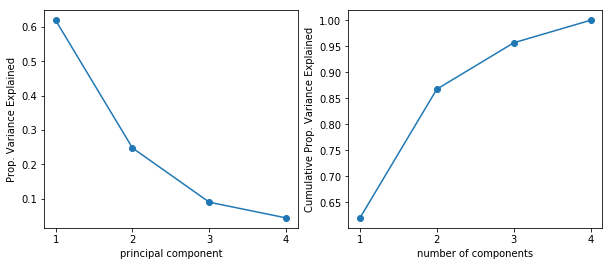

In [263]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1,2,1)
explained_var_df['Prop'].plot(kind='line',marker='o',linestyle='-')
plt.xlabel('principal component')
plt.ylabel('Prop. Variance Explained')
plt.xticks([1,2,3,4])

ax = fig.add_subplot(1,2,2)
explained_var_df['Cumulative Prop'].plot(kind='line',marker='o',linestyle='-')
plt.xlabel('number of components')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.xticks([1,2,3,4])

plt.show()

pc1이 기존 data 정보의 60%, pc2가 나머지 30% 정도를 설명하여, 두개의 pc만으로도 기존 data 정보의 90%정도를 설명합니다. pc3부터는 기존 정보의 10%도 설명 못하기때문에, 총 4개의 pc중 처음 2개만 사용하는게 좋을 것 같습니다.

그럼 기존의 4차원 data를 pc1, pc2 개의 pc를 이용한 2차원 data로 압축해서 plot을 그려보겠습니다.

In [264]:
PrincipalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data= PrincipalComponents, columns=['PC1','PC2','PC3','PC4'])
principal_df['city']=df.iloc[:,0]

principal_df.head()                            

,PC1,PC2,PC3,PC4,city
0,0.985566,1.133392,-0.444269,0.156267,Alabama
1,1.950138,1.073213,2.040003,-0.438583,Alaska
2,1.763164,-0.745957,0.054781,-0.834653,Arizona
3,-0.141420,1.119797,0.114574,-0.182811,Arkansas
4,2.523980,-1.542934,0.598557,-0.341996,California


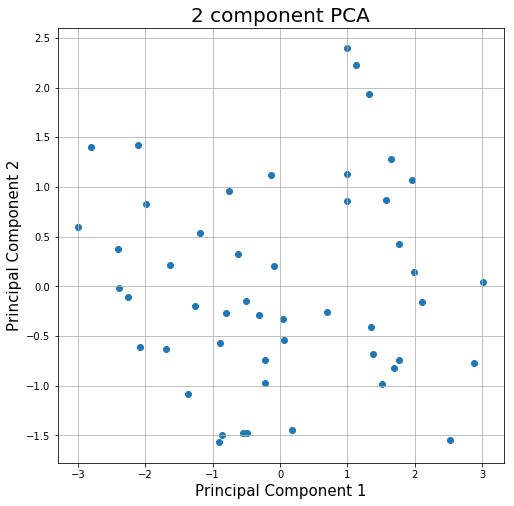

In [265]:
fig = plt.figure(figsize=(8,8))

plt.scatter(x=principal_df.PC1, y=principal_df.PC2) 
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)

plt.grid()
plt.show()

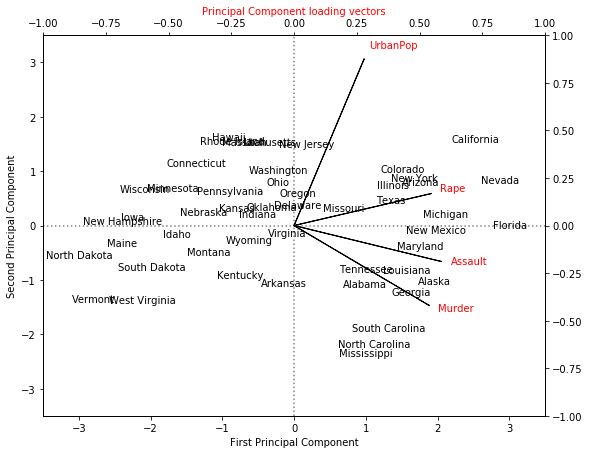

In [266]:
from sklearn.preprocessing import scale

df = pd.read_csv('USArrests.csv', index_col=0)
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3','V4'])

pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])

plt.show()

PC들의 loading을 볼때는 절대값을 씌운 값의 크기를 봐야합니다.   
       
pc1은 Rape, Assault, Murder 변수들 loading의 절대값이 크고 UrbanPop의 loading 절대값은 작습니다. 즉 이 pc1이라는 변수는 각 도시들의 범죄의 정도를 나타내는 변수라고 볼 수 있습니다.
    
이와 달리 pc2는 UrbanPop의 loading 절대값이 크고, 나머지 Murder, Assault, Murder 변수들의 loading 절대값은 작습니다. 즉 이 변수는 얼마나 도시화가 됐는지 정도를 나타내는 것 같습니다.
이때 UrbanPop이 높을수록 Murder이나 Assault는 적게 일어나는 경향을 보인다는 것을 알 수 있습니다.    
     
     
califonia같은 경우는 pc1 score도 높고, pc2 score도 높습니다. 즉 도시화가 많이 됐지만, 범죄도 꽤 많이 일어난다고 볼 수 있습니다.    
반면 Vermont 같은 경우는 pc1 score가 매우 낮고, pc2 score도 낮은 편입니다. 즉 도시화가 많이 안되긴 했지만, 범죄가 많이 안일어나는 도시라고 볼 수 있습니다.

# Kmeans

다음으로는 동일한 USArrests data를 Kmeans를 통해 군집화 해보겠습니다.

In [208]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist, pdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
df= pd.read_csv('USArrests.csv')
df.columns = ['City', 'Murder', 'Assault', 'UrbanPop', 'Rape']
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


pca에서와 마찬가지로, 변수들의 단위가 다르므로 먼저 scaling을 해줍니다.

In [268]:
features = df.columns[1:]

x= df.loc[:,features]
x= pd.DataFrame(StandardScaler().fit_transform(x), columns=features)
x.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-7.105427e-17,1.387779e-16,-4.396483e-16,8.593126e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


다음으로는 cluster 개수를 어떻게 설정할지 살펴보겠습니다.

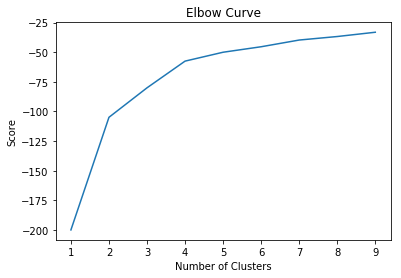

In [269]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

kmeans를 이용해 clustering을 하는 경우, 먼저 cluster의 개수를 설정해줘야 합니다. 이때 cluster 개수를 미리 알고 있는 경우는 그대로 사용할 수 있겠지만, 만약 cluster 개수를 모르는 경우에는 어떤 근거를 가지고 이 개수를 설정해줘야 합니다.   
   
이렇게 cluster 개수를 설정할 때, elbow curve라는 것을 그려보고 cluster의 개수를 정하는 방법이 있다고 합니다. 
만약 y축에 sse같이 에러가 오는 경우는, cluster를 하나 추가하더라도 error가 줄어드는 양이 적은 경우, 해당 k를 cluster 개수로 설정합니다.   
만약 y축에 explained variances나 score가 오는 경우는, 반대로 cluster를 하나 추가하더라도 설명되는 variance가 증가하는 양이 적은 경우, 해당 k를 cluster 개수로 설정합니다.   
     
그래프에서 cluster개수 4개까지는 score가 급격히 늘어나는데, 여기서 cluster개수를 추가하더라도 score가 커지는 폭이 상당히 줄어드는 것을 볼 수 있습니다. 따라서 저는 cluster 개수 k를 4개로 설정하려고 합니다.

cluster를 4개로 설정하여 data를 군집화한 후, cluster별로 특성을 살펴보겠습니다.

In [270]:
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(x)
labels = kmeans.predict(x)
c=kmeans.cluster_centers_

In [271]:
x['labels']=labels
x.head()

,Murder,Assault,UrbanPop,Rape,labels
0,1.255179,0.790787,-0.526195,-0.003451,1
1,0.513019,1.118060,-1.224067,2.509424,2
2,0.072361,1.493817,1.009122,1.053466,2
3,0.234708,0.233212,-1.084492,-0.186794,1
4,0.281093,1.275635,1.776781,2.088814,2


데이터 변수가 4개로 4차원이므로, 한눈에 그래프를 볼 수 없습니다.   
따라서 각 label별로 Murder, Assault, UrbanPop, Rape 수치가 어떻게 다른지만 확인해보겠습니다.

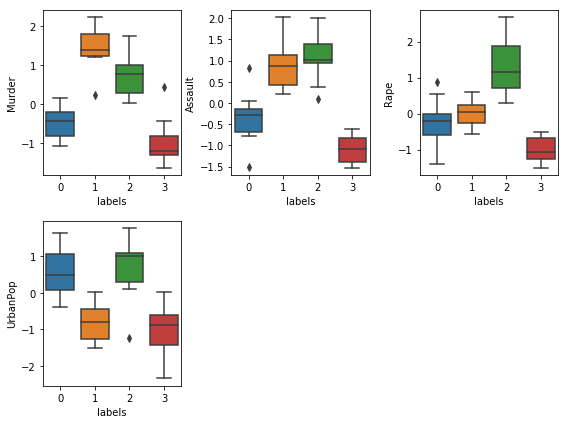

In [272]:
y_index = ['Murder','Assault','Rape','UrbanPop']

fig = plt.figure(figsize=(8,6))

for n,i in enumerate(y_index):
    
    ax=fig.add_subplot(2,3,n+1)
    sns.boxplot(x='labels',y=i,data=x, ax=ax)
    
plt.tight_layout()
plt.show()

- boxplot을 보면, Murder, Assault, Rape과 같이 범죄와 관련된 변수에 대해서는 1,2번 label 도시가 가장 높고, 그다음은 0번 label이 높고, 3번 label이 가작 작습니다. 이때 Murder이나 Assault 범죄는 1,2번 label모두 높은데, rape 범죄는 2번 label만 높게 나타나는 것을 확인할 수 있습니다. 즉 범죄의 정도 측면에서 봤을 때, 1,2번 label 도시들은 범죄가 많이 일어나는 특징이있고 그중에서도 2번 label이 더 심하고, 0,3번 label 도시들은 범죄가 적게 일어나는 특징이 있습니다. 
          
- 다음으로는 urbanPop변수를 보면, 0, 2 label은 높고, 1,3 label 은 낮게 나타났습니다.  
- 전체적으로 봤을 때, 도시화 정도가 높은 0,2번 label에서 0번 label은 범죄 정도가 낮고, 2번 label은 범죄 정도가 높습니다. 또한 도시화가 정도가 낮은 1,3번 label에서 1번 label은 범죄 정도가 높고, 3번 label은 범죄 정도가 낮습니다. 따라서 범죄정도와 도시화정도의 두가지 범주에 대해서 다음과 같이 군집화 된 것 같습니다. 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-uys7{border-color:inherit;text-align:center}
</style>
<table class="tg">
  <tr>
    <th class="tg-uys7" colspan="2" rowspan="2">Kmeans with k=4</th>
    <th class="tg-uys7" colspan="2">도시화 정도</th>
  </tr>
  <tr>
    <td class="tg-uys7">높다</td>
    <td class="tg-uys7">낮다</td>
  </tr>
  <tr>
    <td class="tg-uys7" rowspan="2">범죄 정도</td>
    <td class="tg-uys7">높다</td>
    <td class="tg-uys7">label 2</td>
    <td class="tg-uys7">label 1</td>
  </tr>
  <tr>
    <td class="tg-uys7">낮다</td>
    <td class="tg-uys7">label 0</td>
    <td class="tg-uys7">label 3</td>
  </tr>
</table>

하지만 kmeans같은 경우, 기본적으로 유클리드 거리를 사용하여 clustering을 합니다. 따라서 데이터의 차원이 높아질수록 데이터가 제대로 군집되지 않을 가능성이 높습니다.  
            
이에 앞에서 사용했던 pca를 이용해서 데이터의 차원을 먼저 줄인 후, kmeans를 사용해 데이터를 군집화해보겠습니다. 

# PCA + Kmeans

앞의 PCA과정에서 2개의 PC가 기존 정보의 90%정도를 설명한다는 것을 확인했으므로, 2개의 PC를 이용해 기존의 4차원 data를 2차원으로 압축하겠습니다.

In [273]:
df= pd.read_csv('USArrests.csv')
df.columns = ['City', 'Murder', 'Assault', 'UrbanPop', 'Rape']
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


앞에서와 마찬가지로, 변수들의 단위가 다르므로 먼저 scaling을 해줍니다.

In [274]:
features = df.columns[1:]

x= df.loc[:,features]
x= pd.DataFrame(StandardScaler().fit_transform(x), columns=features)
x.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-7.105427e-17,1.387779e-16,-4.396483e-16,8.593126e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


In [275]:
pca = PCA(n_components=2)
pca.fit(x)

index = ['Murder','Assault','UrbanPop','Rape']
loading = pca.components_
loading_df = pd.DataFrame(loadings.T,columns=['PC1','PC2','PC3','PC4'])
loading_df.index = index
loading_df                         

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


앞에서와 마찬가지로, pc1은 범죄정도와 관련된 변수이고, pc2는 도시화 정도와 관련된 변수입니다. pc1이 클수록 범죄가 많은 도시, pc2가 작을수록 도시화가 많이 된 도시입니다. 

이중 PC1, PC2 두개의 만 사용하여 분석을 진행하겠습니다.

In [297]:
PrincipalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data= PrincipalComponents, columns=['PC1','PC2'])
principal_df['PC2'] = -principal_df['PC2']

principal_df.head()   

,PC1,PC2
0,0.985566,-1.133392
1,1.950138,-1.073213
2,1.763164,0.745957
3,-0.141420,-1.119797
4,2.523980,1.542934


다음으로 elbow curve를 확인해보고 cluster 개수를 설정하겠습니다.

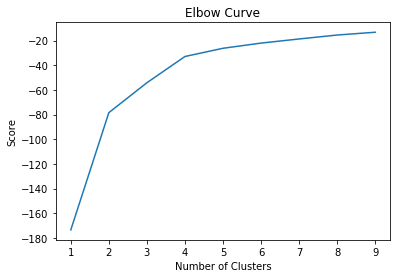

In [298]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(principal_df).score(principal_df) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

이번에도 cluster 개수는 4개가 적당해 보입니다. k=4로 설정해서 kmeans clustering을 해보겠습니다.

In [299]:
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(principal_df)
labels = kmeans.predict(principal_df)
c=kmeans.cluster_centers_

principal_df['labels']=labels
principal_df.head()

,PC1,PC2,labels
0,0.985566,-1.133392,2
1,1.950138,-1.073213,2
2,1.763164,0.745957,0
3,-0.141420,-1.119797,2
4,2.523980,1.542934,0


이번엔 PCA과정을 통해 data가 2차원으로 축소됐으므로, data를 전체적으로 확인해보겠습니다.

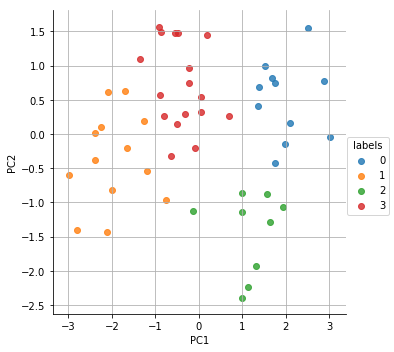

In [300]:
sns.lmplot(x='PC1',y='PC2',data=principal_df,fit_reg=False,hue='labels')
plt.grid()
plt.show()


앞서 pc1은 범죄와 관련된 변수, pc2는 도시화와 관련된 변수였습니다.   
pc1이 높은 점들은 범죄가 많은 도시, 낮은 점들은 범죄가 적은 도시라고 볼 수 있습니다. 
또한 pc2가 높은 점들은 도시화가 많이 된 도시, 낮은 점들은 도시화가 덜 된 도시라고 볼 수 있습니다.   
     
이런 변수들이 군집화 된 결과를 보면,       
label0은 도시화가 잘됐는데 범죄가 많은 군집,     
label3은 도시화가 잘됐는데 범죄가 적은 군집,      
label2는 도시화가 덜됐는데 범죄가 많은 군집,       
label1은 도시화가 덜됐는데 범죄가 적은 군집입니다.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-88nc{font-weight:bold;border-color:inherit;text-align:center}
.tg .tg-uys7{border-color:inherit;text-align:center}
</style>
<table class="tg">
  <tr>
    <th class="tg-88nc" colspan="2" rowspan="2">PCA &amp; Kmeans with k=4</th>
    <th class="tg-88nc" colspan="2">도시화 정도</th>
  </tr>
  <tr>
    <td class="tg-88nc">높다</td>
    <td class="tg-88nc">낮다</td>
  </tr>
  <tr>
    <td class="tg-88nc" rowspan="2">범죄 정도</td>
    <td class="tg-88nc">높다</td>
    <td class="tg-uys7">label 0</td>
    <td class="tg-uys7">label 2</td>
  </tr>
  <tr>
    <td class="tg-88nc">낮다</td>
    <td class="tg-uys7">label 3</td>
    <td class="tg-uys7">label 1</td>
  </tr>
</table>

Kmeans를 했을때도 도시화 정도와 범죄 정도를 기준으로 4가지 군집으로 clustering 됐고, pca로 차원을 축소한 후 Kmeans를 했을때도 비슷한 기준으로 4가지 군집으로 clustering된 것 같다. 그럼 두 결과가 얼마나 차이나는지 확인해보자.

In [301]:
df= pd.read_csv('USArrests.csv')
df.columns = ['City', 'Murder', 'Assault', 'UrbanPop', 'Rape']

# scaling
features = df.columns[1:]

x= df.loc[:,features]
x= pd.DataFrame(StandardScaler().fit_transform(x), columns=features)

# Kmeans
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(x)
labels_kmeans = kmeans.predict(x)

# PCA + Kmeans
pca = PCA(n_components=2)
pca.fit(x)

PrincipalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data= PrincipalComponents, columns=['PC1','PC2'])
principal_df['PC2'] = -principal_df['PC2']

kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(principal_df)
labels_pc_kmeans = kmeans.predict(principal_df)

In [323]:
compare = pd.DataFrame()
compare['kmeans_label']=labels_kmeans
compare['pca_kmeans_label']=labels_pc_kmeans

compare.head()

,kmeans_label,pca_kmeans_label
0,1,2
1,2,2
2,2,0
3,1,2
4,2,0


두가지 labeling 기준이 조금 다르니, 같은 labeling으로 맞춰주자.
     
kmeans_label 0 = pca_kmeans_label 3    
kmeans_label 1 = pca_kmeans_label 2    
kmeans_label 2 = pca_kmeans_label 0    
kmeans_label 3 = pca_kmeans_label 1     

이렇게 labeling을 맞춰보면,

In [324]:
index0 = compare['pca_kmeans_label']==3  
index1 = compare['pca_kmeans_label']==2
index2 = compare['pca_kmeans_label']==0
index3 = compare['pca_kmeans_label']==1  

compare.loc[index0,'pca_kmeans_label']=0
compare.loc[index1,'pca_kmeans_label']=1
compare.loc[index2,'pca_kmeans_label']=2
compare.loc[index3,'pca_kmeans_label']=3

compare.head()

,kmeans_label,pca_kmeans_label
0,1,1
1,2,1
2,2,2
3,1,1
4,2,2


In [325]:
from sklearn.metrics import confusion_matrix

In [326]:
confusion_matrix(compare.kmeans_label,compare.pca_kmeans_label)

array([[16,  0,  0,  0],
       [ 0,  8,  0,  0],
       [ 1,  1, 11,  0],
       [ 0,  0,  0, 13]], dtype=int64)

kmeans는 거리를 기준으로 clustering을 진행하기 때문에, 차원이 커지면 거리개념이 모호해져서 제대로 된 분류가 되지 않을 수 있다.    
        
이번 data의 경우 기존 data의 차원이 4차원으로 많이 크진 않기 때문에, kmeans만 사용했을때와, pca를 통해 차원을 축소한 후 kmeans를 했을 때 분류 결과가 크게 차이가 없었다. 

                
다음에는 조금 더 큰 차원의 data를 이용해, 단순 kmeans를 했을 때와 pca로 차원을 축소시킨 후 kmeans를 했을때의 결과를 비교해 보고, 큰 차원에서 kmeans가 제대로된 clustering을 하지 못할 수 있다는 점을 보이고 싶다.